# NHL Project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Read the data

df = pd.read_csv(r'C:\Users\alexw\Desktop\Projects\Python Projects\NHL Correlation Project\nhl.csv')

In [6]:
df.head()

,id,year,round_selected,overall_pick,team,player,nationality,position,age,amateur_league,amateur_team,years_played_in_NHL,games_played,goals,assists,points
0,1,2022,1,1,Montreal Canadiens,Juraj Slafkovsky,Slovakia,LW,18.0,Finland,TPS,0,0,0,0,0
1,2,2022,1,2,New Jersey Devils,Simon Nemec,Slovakia,D,18.0,Slovakia,HK Nitra,0,0,0,0,0
2,3,2022,1,3,Arizona Coyotes,Logan Cooley,United States,C,18.0,USHL,USA U-18 Development Team,0,0,0,0,0
3,4,2022,1,4,Seattle Kraken,Shane Wright,Canada,C,18.0,OHL,Kingston Frontenacs,0,0,0,0,0
4,5,2022,1,5,Philadelphia Flyers,Cutter Gauthier,Sweden,LW,18.0,USHL,USA U-18 Development Team,0,0,0,0,0


<AxesSubplot:>

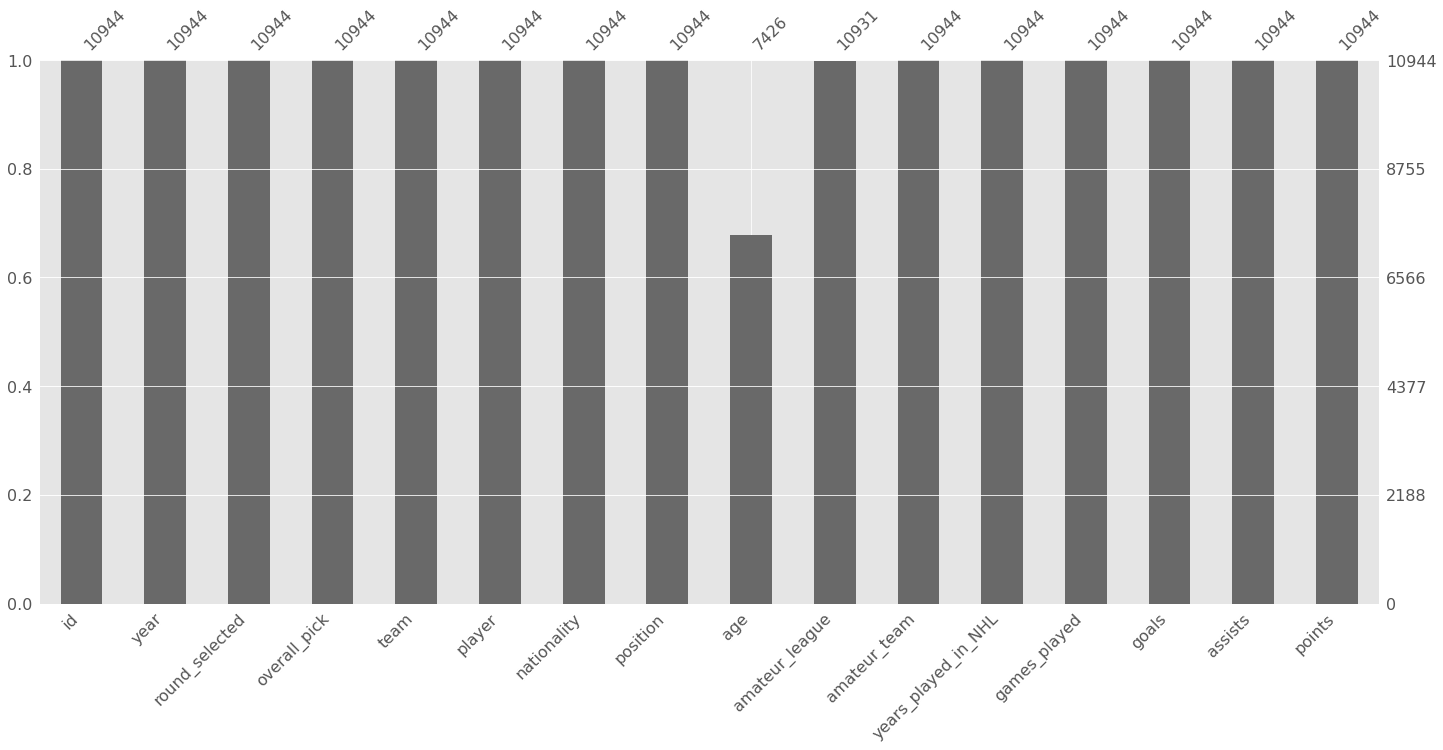

In [8]:
# Checknig for missing data

missingno.bar(df)

In [4]:
# Checking data types for columns

df.dtypes

id                       int64
year                     int64
round_selected           int64
overall_pick             int64
team                    object
player                  object
nationality             object
position                object
age                    float64
amateur_league          object
amateur_team            object
years_played_in_NHL      int64
games_played             int64
goals                    int64
assists                  int64
points                   int64
dtype: object

In [19]:
# Sorting the data by year and overall pick

df1 = df.sort_values(by=['year', 'overall_pick'], inplace=False, ascending=[False, True])

In [20]:
# Displaying the sorted dataframe

df1

,id,year,round_selected,overall_pick,team,player,nationality,position,age,amateur_league,amateur_team,years_played_in_NHL,games_played,goals,assists,points
0,1,2022,1,1,Montreal Canadiens,Juraj Slafkovsky,Slovakia,LW,18.0,Finland,TPS,0,0,0,0,0
1,2,2022,1,2,New Jersey Devils,Simon Nemec,Slovakia,D,18.0,Slovakia,HK Nitra,0,0,0,0,0
2,3,2022,1,3,Arizona Coyotes,Logan Cooley,United States,C,18.0,USHL,USA U-18 Development Team,0,0,0,0,0
3,4,2022,1,4,Seattle Kraken,Shane Wright,Canada,C,18.0,OHL,Kingston Frontenacs,0,0,0,0,0
4,5,2022,1,5,Philadelphia Flyers,Cutter Gauthier,Sweden,LW,18.0,USHL,USA U-18 Development Team,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9239,12245,1963,1,16,Chicago Blackhawks,Bill Carson,Canada,D,NaN,NaN,Brampton Midgets,0,0,0,0,0
9240,12246,1963,1,17,Toronto Maple Leafs,Jim McKenny,Canada,D,16.0,MetJAHL,Toronto Neil McNeil Maroons,16,604,82,247,329
9241,12247,1963,1,18,Montreal Canadiens,Glen Shirton,Canada,D,NaN,NaN,Port Colborne Midgets,0,0,0,0,0
9242,12249,1963,1,20,New York Rangers,Campbell Alleson,Canada,D,NaN,NaN,Portage la Prairie Jr.,0,0,0,0,0


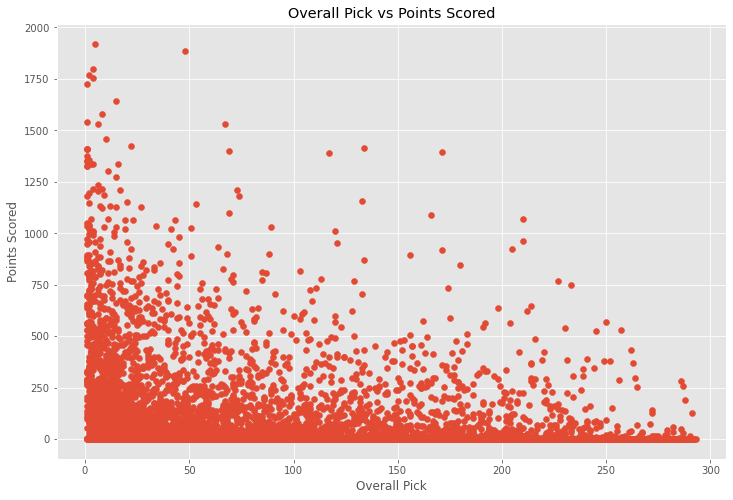

In [27]:
# Finding the correlation between an overall pick and a player's performance 
# Building a round selected vs points scatterplot

plt.scatter(x=df1['overall_pick'], y=df1['points'])

plt.title('Overall Pick vs Points Scored')

plt.xlabel('Overall Pick')

plt.ylabel('Points Scored')

plt.show()


<AxesSubplot:xlabel='overall_pick', ylabel='points'>

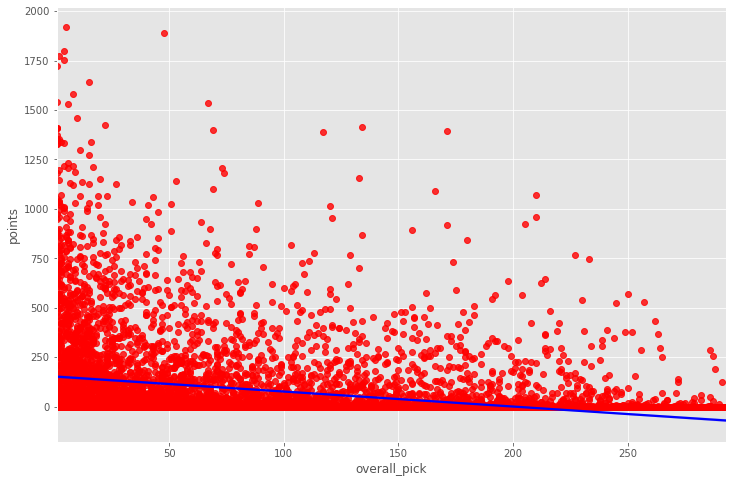

In [26]:
# Building a regression plot (overall pick vs points) via Seaborn

sns.regplot(x='overall_pick', y='points', data = df1, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

# As overall pick decreases, points scored by a player (i.e., player's performance) decreases.
# This indicates that players with a higher overall pick are likely to have a more productive career in NHL

<AxesSubplot:xlabel='round_selected', ylabel='value'>

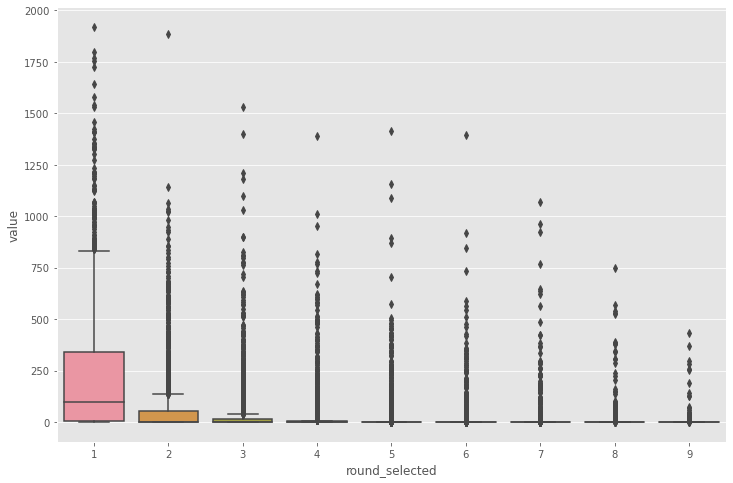

In [33]:
# Creating a box plot to see a performance of players selected in different rounds

box = pd.melt(df1,id_vars=['round_selected'],value_vars=['points'])
sns.boxplot(x='round_selected',y='value',data=box)

<AxesSubplot:xlabel='round_selected', ylabel='points'>

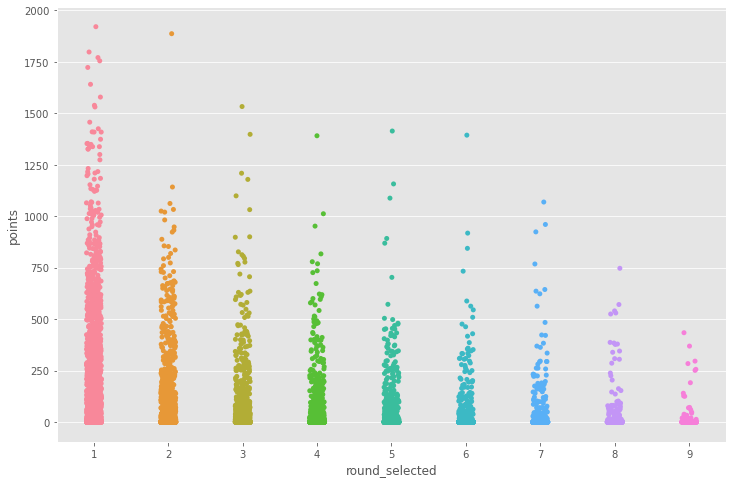

In [49]:
# Creating a strip plot to see a performance of players selected in different rounds

sns.stripplot(x="round_selected", y="points", data=df1)

<AxesSubplot:xlabel='position', ylabel='points'>

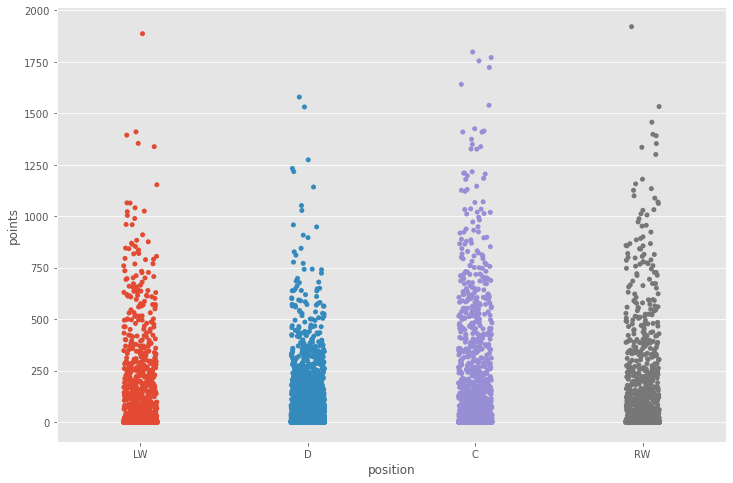

In [50]:
# Creating a strip plot to see a performance of players of different positions

sns.stripplot(x="position", y="points", data=df1)

In [34]:
# Examiing the correlation between remaining variables
# Initial correlation matrix

df1.corr()

,id,year,round_selected,overall_pick,age,years_played_in_NHL,games_played,goals,assists,points
id,1.000000,-0.997996,-0.044385,-0.045776,0.278751,0.097344,0.114881,0.109707,0.117531,0.116769
year,-0.997996,1.000000,0.070631,0.072391,-0.272521,-0.107019,-0.123151,-0.116172,-0.124331,-0.123572
round_selected,-0.044385,0.070631,1.000000,0.991273,0.190496,-0.364204,-0.347291,-0.288638,-0.301950,-0.302703
overall_pick,-0.045776,0.072391,0.991273,1.000000,0.188640,-0.372085,-0.357234,-0.299742,-0.313462,-0.314283
age,0.278751,-0.272521,0.190496,0.188640,1.000000,-0.010475,0.006875,0.000335,0.006221,0.003994
years_played_in_NHL,0.097344,-0.107019,-0.364204,-0.372085,-0.010475,1.000000,0.867529,0.655725,0.712041,0.703864
games_played,0.114881,-0.123151,-0.347291,-0.357234,0.006875,0.867529,1.000000,0.827579,0.892093,0.884260
goals,0.109707,-0.116172,-0.288638,-0.299742,0.000335,0.655725,0.827579,1.000000,0.918110,0.969261
assists,0.117531,-0.124331,-0.301950,-0.313462,0.006221,0.712041,0.892093,0.918110,1.000000,0.987398
points,0.116769,-0.123572,-0.302703,-0.314283,0.003994,0.703864,0.884260,0.969261,0.987398,1.000000


In [38]:
# Dropping columns that will not be used in the final correlation matrix

df2 = df1.drop(['id','year','age'], axis=1)

df2

,round_selected,overall_pick,team,player,nationality,position,amateur_league,amateur_team,years_played_in_NHL,games_played,goals,assists,points
0,1,1,Montreal Canadiens,Juraj Slafkovsky,Slovakia,LW,Finland,TPS,0,0,0,0,0
1,1,2,New Jersey Devils,Simon Nemec,Slovakia,D,Slovakia,HK Nitra,0,0,0,0,0
2,1,3,Arizona Coyotes,Logan Cooley,United States,C,USHL,USA U-18 Development Team,0,0,0,0,0
3,1,4,Seattle Kraken,Shane Wright,Canada,C,OHL,Kingston Frontenacs,0,0,0,0,0
4,1,5,Philadelphia Flyers,Cutter Gauthier,Sweden,LW,USHL,USA U-18 Development Team,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9239,1,16,Chicago Blackhawks,Bill Carson,Canada,D,NaN,Brampton Midgets,0,0,0,0,0
9240,1,17,Toronto Maple Leafs,Jim McKenny,Canada,D,MetJAHL,Toronto Neil McNeil Maroons,16,604,82,247,329
9241,1,18,Montreal Canadiens,Glen Shirton,Canada,D,NaN,Port Colborne Midgets,0,0,0,0,0
9242,1,20,New York Rangers,Campbell Alleson,Canada,D,NaN,Portage la Prairie Jr.,0,0,0,0,0


In [39]:
# Updated Correlation Matrix

df2.corr()

,round_selected,overall_pick,years_played_in_NHL,games_played,goals,assists,points
round_selected,1.000000,0.991273,-0.364204,-0.347291,-0.288638,-0.301950,-0.302703
overall_pick,0.991273,1.000000,-0.372085,-0.357234,-0.299742,-0.313462,-0.314283
years_played_in_NHL,-0.364204,-0.372085,1.000000,0.867529,0.655725,0.712041,0.703864
games_played,-0.347291,-0.357234,0.867529,1.000000,0.827579,0.892093,0.884260
goals,-0.288638,-0.299742,0.655725,0.827579,1.000000,0.918110,0.969261
assists,-0.301950,-0.313462,0.712041,0.892093,0.918110,1.000000,0.987398
points,-0.302703,-0.314283,0.703864,0.884260,0.969261,0.987398,1.000000


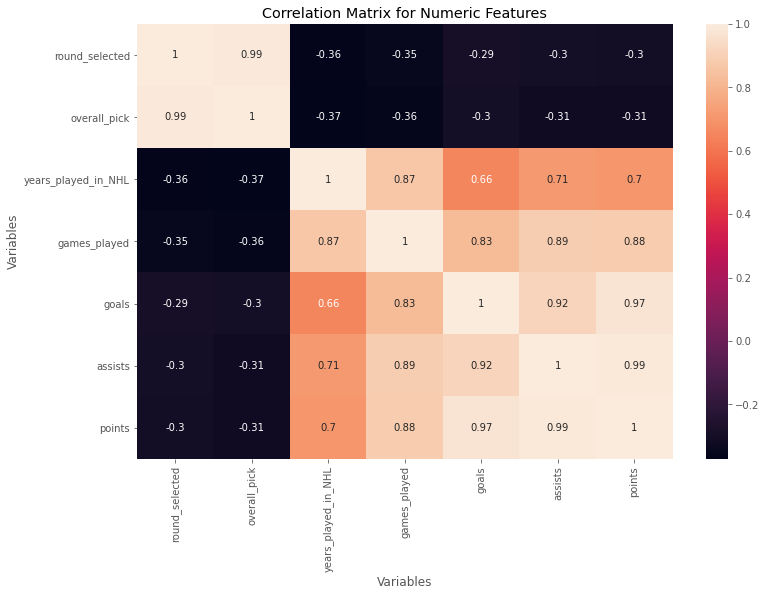

In [41]:
# Creating a Heat Map

correlation_matrix = df2.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Variables')

plt.ylabel('Variables')

plt.show()

In [44]:
# Turning object types into categorical types and giving them codes

df_numerised = df2

for col_name in df_numerised.columns:
    if(df_numerised[col_name].dtype == 'object'):
        df_numerised[col_name] = df_numerised[col_name].astype('category')
        df_numerised[col_name] = df_numerised[col_name].cat.codes
        
df_numerised

,round_selected,overall_pick,team,player,nationality,position,amateur_league,amateur_team,years_played_in_NHL,games_played,goals,assists,points
0,1,1,23,5421,9,2,38,1053,0,0,0,0,0
1,1,2,25,9403,9,1,133,416,0,0,0,0,0
2,1,3,1,6076,12,0,144,1111,0,0,0,0,0
3,1,4,35,9332,0,0,113,540,0,0,0,0,0
4,1,5,30,2133,10,2,144,1111,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9239,1,16,9,821,0,1,-1,105,0,0,0,0,0
9240,1,17,38,4786,0,1,93,1086,16,604,82,247,329
9241,1,18,23,3659,0,1,-1,826,0,0,0,0,0
9242,1,20,27,1606,0,1,-1,830,0,0,0,0,0


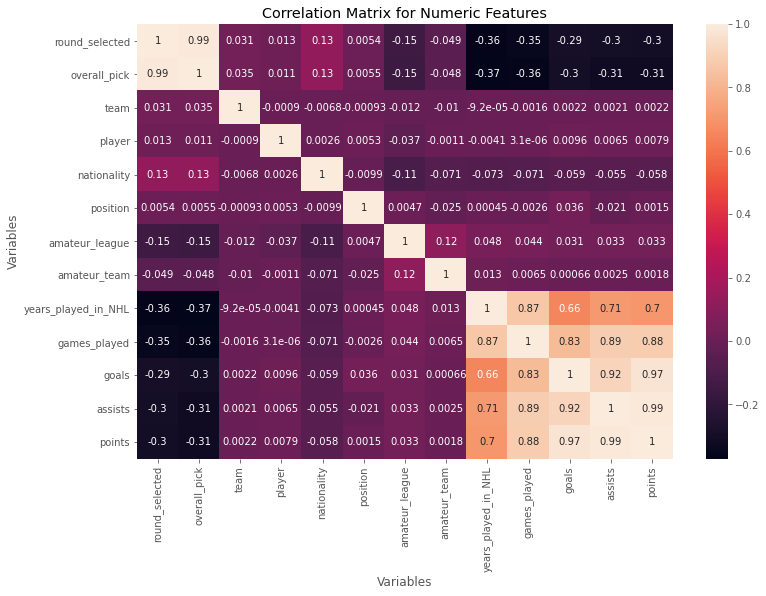

In [46]:
# Creating a Heat Map for all variables in the data frame

correlation_matrix1 = df_numerised.corr()

sns.heatmap(correlation_matrix1, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Variables')

plt.ylabel('Variables')

plt.show()

In [53]:
# Removing the limit on the amount of rows that can be seen in order to see all correlations pairs

pd.set_option('display.max_rows', None)

In [54]:
# Unstacking the correlation matrix

correlation_matrix1 = df_numerised.corr()

corr_pairs = correlation_matrix1.unstack()

corr_pairs

round_selected       round_selected         1.000000
                     overall_pick           0.991273
                     team                   0.031053
                     player                 0.013042
                     nationality            0.128909
                     position               0.005413
                     amateur_league        -0.146906
                     amateur_team          -0.049203
                     years_played_in_NHL   -0.364204
                     games_played          -0.347291
                     goals                 -0.288638
                     assists               -0.301950
                     points                -0.302703
overall_pick         round_selected         0.991273
                     overall_pick           1.000000
                     team                   0.035064
                     player                 0.011372
                     nationality            0.128918
                     position               0.

In [55]:
# Sorting the correlation pairs

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

overall_pick         years_played_in_NHL   -0.372085
years_played_in_NHL  overall_pick          -0.372085
                     round_selected        -0.364204
round_selected       years_played_in_NHL   -0.364204
games_played         overall_pick          -0.357234
overall_pick         games_played          -0.357234
games_played         round_selected        -0.347291
round_selected       games_played          -0.347291
points               overall_pick          -0.314283
overall_pick         points                -0.314283
assists              overall_pick          -0.313462
overall_pick         assists               -0.313462
points               round_selected        -0.302703
round_selected       points                -0.302703
                     assists               -0.301950
assists              round_selected        -0.301950
goals                overall_pick          -0.299742
overall_pick         goals                 -0.299742
goals                round_selected        -0.